# 1.0 McNulty Exploratory Visualizations (Draft)

In [1]:
import mcnultymod
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

# import os

from datetime import datetime, timedelta, date

In [2]:
auctions = pd.read_pickle('../data/auctionsclosed.pkl')

In [4]:
auctions.sample(5)

,address,parcelid,price,closingdate,salestatus,buyerstatus,purchasertype,program,councildistrict,neighborhood,latitude,longitude,location
1217,19329 Spencer,15006118.,1700.0,2017-04-10,Closed,Selected,Homebuyer,Auction,3,Nortown,42.436445,-83.026639,"location\n(42.436445, -83.026639)"
900,6386 Rosemont,22076074.,1000.0,2017-06-05,Closed,Selected,Investor,Auction,7,Warrendale,42.337400,-83.217795,"location\n(42.3374, -83.217795)"
730,12965 St Marys,22059213.,1200.0,2016-10-28,Closed,Selected,Homebuyer,Auction,1,Schoolcraft Southfield,42.384562,-83.205592,"location\n(42.384562, -83.205592)"
118,6245 Stahelin,22084069.,7700.0,2017-04-28,Closed,Selected,Homebuyer,Auction,7,Warrendale,42.335424,-83.224351,"location\n(42.335424, -83.224351)"
508,18400 Coyle,22045094.,4100.0,2015-04-08,Closed,Selected,Homebuyer,Auction,2,Winship,42.425284,-83.194462,"location\n(42.425284, -83.194462)"


### Purchaser Type

''

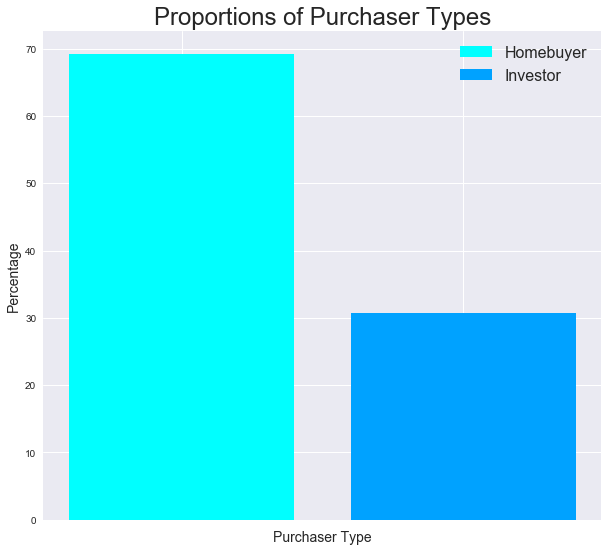

In [5]:
pt_ratios = []

for i in range(0,2):    
    pt_ratios.append((auctions.purchasertype.value_counts()[i] / auctions.shape[0]) * 100)

x_h = [0]
y_h = pt_ratios[0]
x_i = [1]
y_i = pt_ratios[1]

plt.figure(figsize=(10,9))
plt.bar(x_h, y_h, color='cyan', label='Homebuyer')
plt.bar(x_i, y_i, color='#00A2FF', label='Investor')
#plt.ylim(0,1)
plt.xticks([0, 1], ['', ''])
plt.xlabel("Purchaser Type", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.legend(fontsize=16)
plt.title("Proportions of Purchaser Types", fontsize=24)

#plt.savefig('../img/ptypes_bar.png', dpi=200, bbox_inches = 'tight')
;

### Price

In [6]:
auctions.price[auctions.purchasertype == 'Homebuyer'][auctions.price < 5000].shape

(465,)

In [7]:
auctions.price[auctions.purchasertype == 'Investor'][auctions.price < 5000].shape

(186,)

''

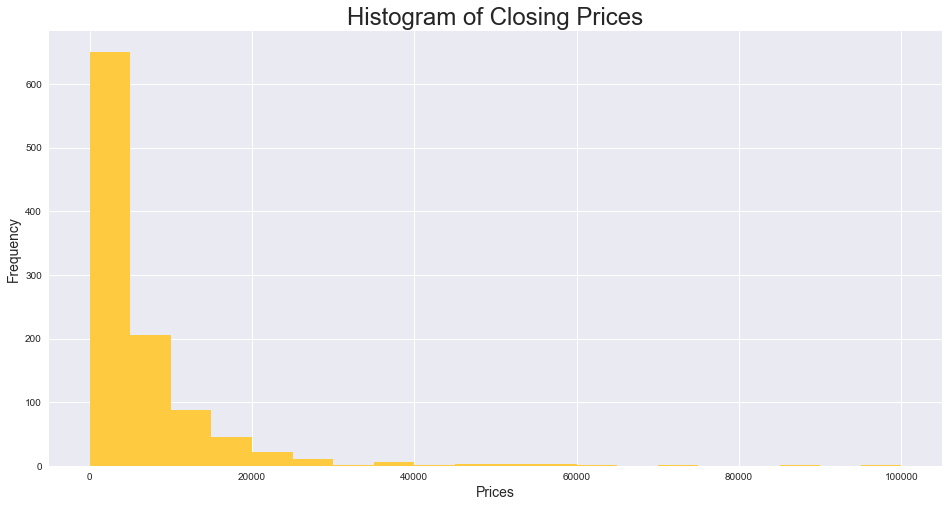

In [8]:
x = auctions.price

# for buyer in ['Homebuyer', 'Investor']:
#     x_sub = np.array(auctions.price[auctions.purchasertype == buyer])
#     x.append(x_sub)

plt.figure(figsize=(16,8))
plt.hist(x, bins=20, range=[0,100000], color='#FDCA40')
# plt.xticks([n*500 for n in range(21)], [n*500 for n in range(21)])
plt.xlabel("Prices", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
# plt.legend(fontsize=12)
plt.title("Histogram of Closing Prices", fontsize=24)

# plt.savefig('../img/hist_price.png', dpi=200, bbox_inches = 'tight')
;

''

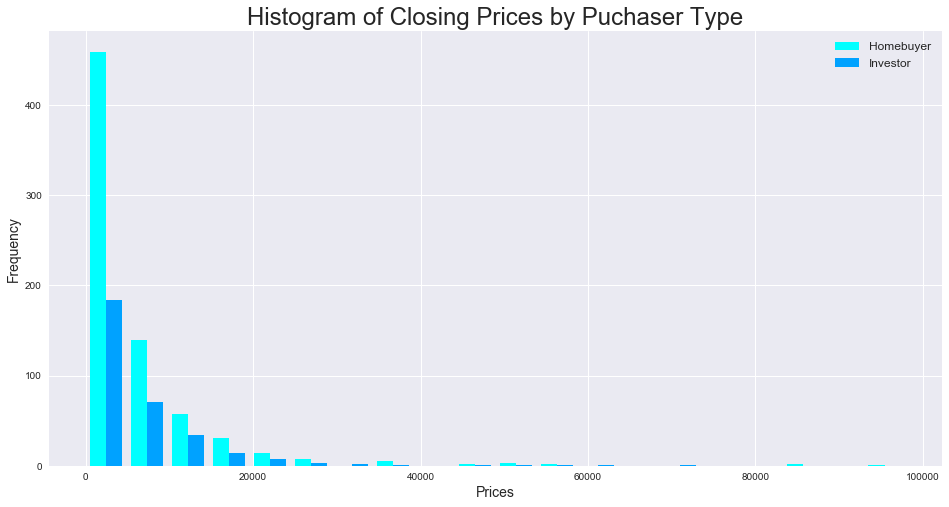

In [9]:
x = []

for buyer in ['Homebuyer', 'Investor']:
    x_sub = np.array(auctions.price[auctions.purchasertype == buyer])
    x.append(x_sub)

plt.figure(figsize=(16,8))
plt.hist(x, bins=20, color=['cyan', '#00A2FF'], label=['Homebuyer', 'Investor'])
# plt.xticks([n*5 for n in range(21)])
plt.xlabel("Prices", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)
plt.title("Histogram of Closing Prices by Puchaser Type", fontsize=24)

#plt.savefig('../img/hist_price_sep.png', dpi=200, bbox_inches = 'tight')
;

''

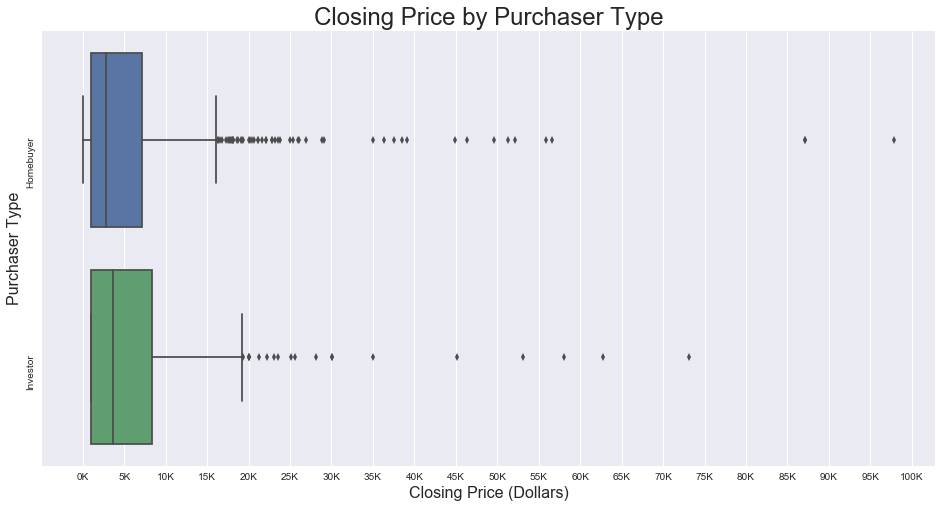

In [11]:
# this was working and now it's not!!!

plt.figure(figsize=(16,8))
# pal = {purchasertype: "#00A2FF" if purchasertype == "Investor" else "cyan" for purchasertype in auctions.purchasertype.unique()}
sns.boxplot(x=auctions.price, 
            y=auctions.purchasertype
            # data=auctions,
            # color=['cyan', 'cornflowerblue'],
            # palette=pal
           )
plt.xlabel("Closing Price (Dollars)", fontsize=16)
plt.ylabel("Purchaser Type", fontsize=16)
plt.yticks(range(2), ['Homebuyer', 'Investor'], rotation=90)
plt.xticks([n*5000 for n in range(21)], [str(5*n)+'K' for n in range(21)])
plt.title("Closing Price by Purchaser Type", fontsize=24)

# plt.savefig('../img/purchaser_box.png', dpi=200, bbox_inches = 'tight')
;

''

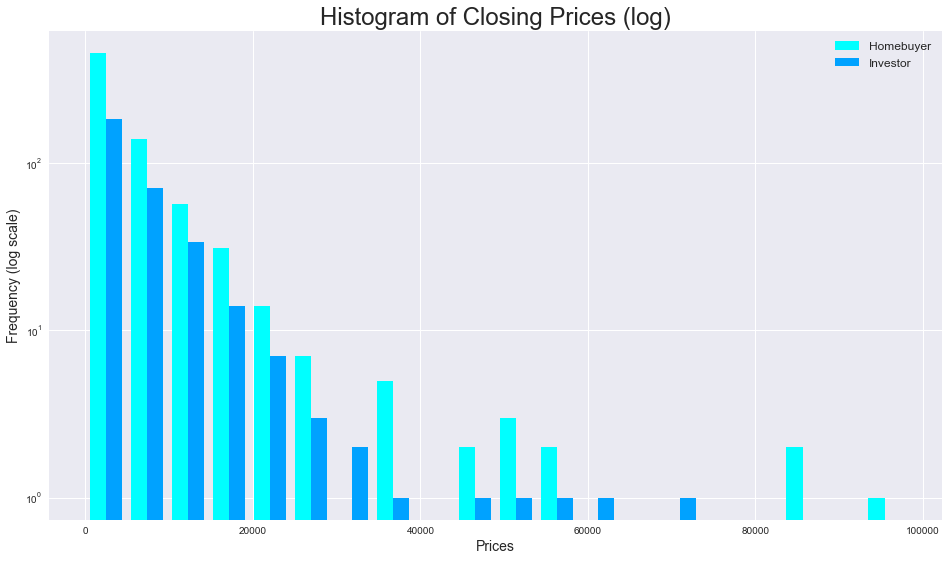

In [36]:
x = []

for buyer in ['Homebuyer', 'Investor']:
    x_sub = np.array(auctions.price[auctions.purchasertype == buyer])
    x.append(x_sub)

plt.figure(figsize=(16,9))
plt.hist(x, bins=20, color=['cyan', '#00A2FF'], label=['Homebuyer', 'Investor'])
plt.yscale('log');
# plt.xticks([n*5 for n in range(21)])
plt.xlabel("Prices", fontsize=14)
plt.ylabel("Frequency (log scale)", fontsize=14)
plt.legend(fontsize=12)
plt.title("Histogram of Closing Prices (log)", fontsize=24)
;

Hard to tell anything from that... perhaps this is better for now:

''

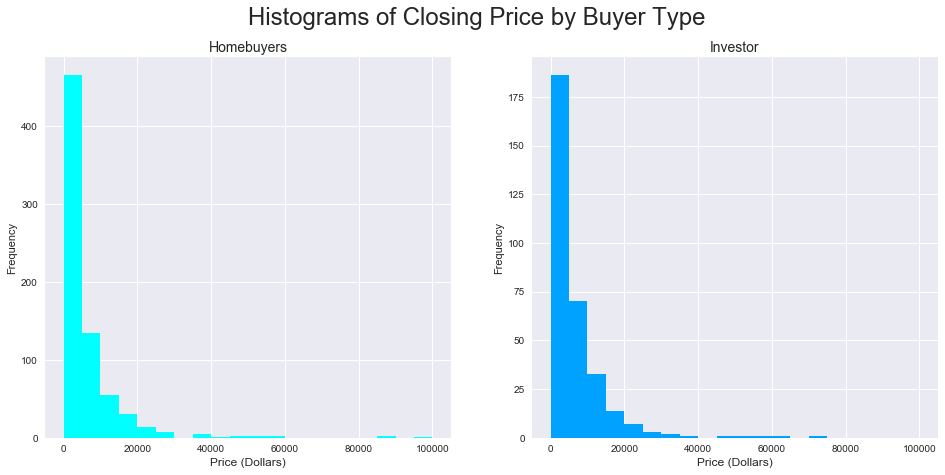

In [117]:
x = []

for buyer in ['Homebuyer', 'Investor']:
    x_sub = np.array(auctions.price[auctions.purchasertype == buyer])
    x.append(x_sub)

fig, ax = plt.subplots(1, 2, figsize=(16,7))

fig.suptitle("Histograms of Closing Price by Buyer Type", fontsize=24)

ax[0].hist(x[0], bins=20, range=[0,100000], color='#00FFFF')
ax[0].set_xlabel("Price (Dollars)", fontsize=12)
ax[0].set_ylabel("Frequency")
ax[0].set_title("Homebuyers", fontsize=14)

ax[1].hist(x[1], bins=20, range=[0,100000], color='#00A2FF')
ax[1].set_xlabel("Price (Dollars)", fontsize=12)
ax[1].set_ylabel("Frequency")
ax[1].set_title("Investor", fontsize=14)

# plt.savefig('../img/hist_price_x2.png', dpi=200, bbox_inches = 'tight')
;

''

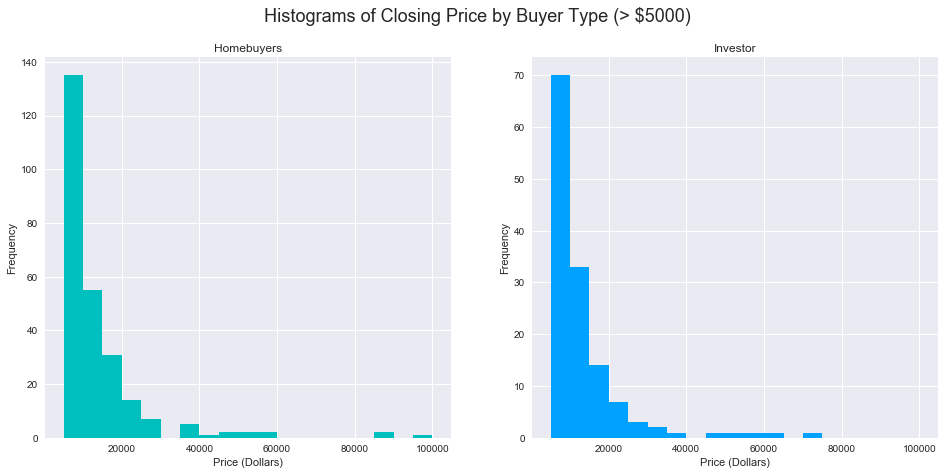

In [8]:
x = []

for buyer in ['Homebuyer', 'Investor']:
    x_sub = np.array(auctions.price[auctions.purchasertype == buyer])
    x.append(x_sub)

fig, ax = plt.subplots(1, 2, figsize=(16,7))

fig.suptitle("Histograms of Closing Price by Buyer Type (> $5000)", fontsize=18)

ax[0].hist(x[0], bins=19, range=[5000,100000], color='c')
ax[0].set_xlabel("Price (Dollars)")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Homebuyers")

ax[1].hist(x[1], bins=19, range=[5000,100000], color='#00A2FF')
ax[1].set_xlabel("Price (Dollars)")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Investor")
    
# plt.figure(figsize=(16,8))
# plt.hist(x, bins=20, color=['cyan', 'blue'], label=['Homebuyer', 'Investor']);
# plt.xticks([n*5 for n in range(21)])
# plt.xlabel("Price", fontsize=12)
# plt.ylabel("Frequency", fontsize=12)
# plt.title("Histogram of Neighborhood Occurrences", fontsize=18)

# plt.savefig('../img/hists_price_over5k.png', dpi=200, bbox_inches = 'tight')
;

''

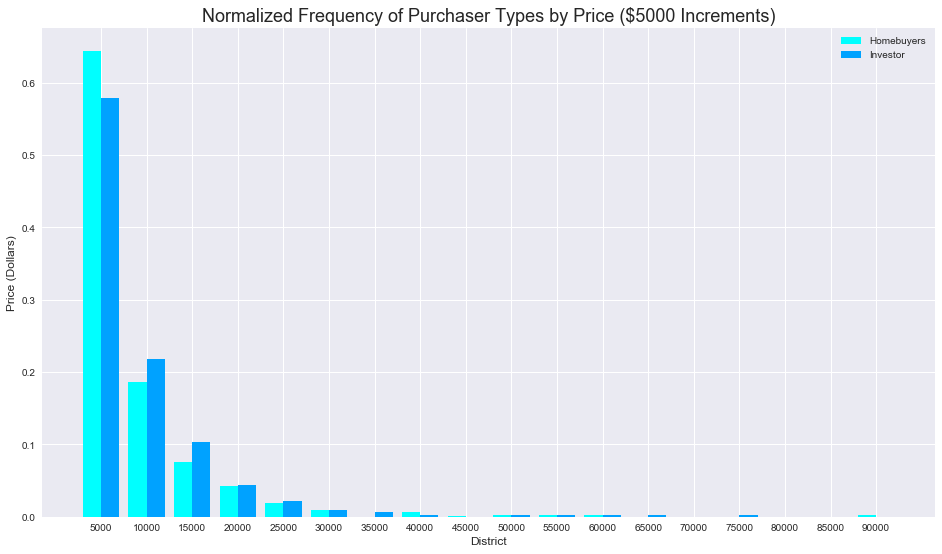

In [9]:
price_counts_norm = []

for buyer in ['Homebuyer', 'Investor']:
    buyer_count = []
    total = auctions[auctions.purchasertype == buyer].shape[0]
    for n in range(18):
        count = (auctions[(auctions.purchasertype == buyer) & 
                 (auctions.price >= n*5000) & 
                 (auctions.price < (n*5000 + 5000))].shape[0]
             )
        buyer_count.append(count / total)
    price_counts_norm.append(buyer_count)

x = np.array(range(0,18))

plt.figure(figsize=(16,9))

plt.bar(x - 0.2,
        price_counts_norm[0],
        color='cyan',
        width=0.4,
        align='center',
        label='Homebuyers')

plt.bar(x + 0.2,
        price_counts_norm[1],
        color='#00A2FF',
        width=0.4,
        align='center',
        label='Investor')

plt.legend()
plt.xticks(range(18), [n*5000 + 5000 for n in range(18)])
plt.xlabel("District", fontsize=12)
plt.ylabel("Price (Dollars)", fontsize=12)
plt.title("Normalized Frequency of Purchaser Types by Price ($5000 Increments)", fontsize=18)

# plt.savefig('../img/bar_districts.png', dpi=200, bbox_inches = 'tight')
;

### Neighborhoods

''

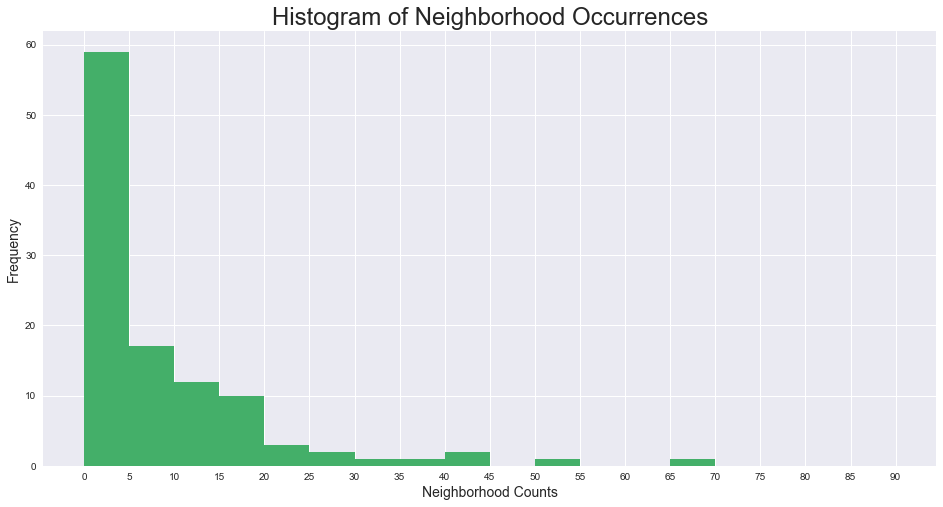

In [14]:
plt.figure(figsize=(16,8))
plt.hist(auctions.neighborhood.value_counts(), bins=18, range=[0,90], color='#44AF69');
plt.xticks([n*5 for n in range(19)])
plt.xlabel("Neighborhood Counts", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Histogram of Neighborhood Occurrences", fontsize=24)

# plt.savefig('../img/hist_nhood.png', dpi=200, bbox_inches = 'tight')
;

### Concentration of Investors per Neighborhood

In [99]:
# calculate investor ratio overall
inv_ratio_all = auctions.purchasertype.value_counts()[1] / auctions.shape[0]
inv_ratio_all

0.30776605944391178

In [29]:
# (auctions
#  .groupby('neighborhood')
#  .count()
#  .filter(['neighborhood', 'parcelid'])
#  .sort_values('parcelid', ascending=False)
#  .rename(columns={'index': 'neighborhood', 'parcelid': 'n_count'})
#  .reset_index()
# ) 

In [30]:
# performs same function as above with fewer lines of code
nhcounts = (auctions
            .neighborhood
            .value_counts()
            .reset_index()
            .rename(columns={'index': 'neighborhood', 'neighborhood': 'n_count'})
           )
# most frequent neighborhoods
nhcounts.head(10)

,neighborhood,n_count
0,Warrendale,99
1,Warren Ave Community,68
2,Morningside,50
3,East English Village,43
4,Fitzgerald/Marygrove,40
5,Cornerstone Village,36
6,Crary/St Marys,31
7,Bagley,29
8,Barton-McFarland,27
9,Boston Edison,24


In [97]:
def add_inv_ratios(row):
    """Calculates investor ratio for each neighborhood, use via .apply() method"""
    
    nhood = row[0] # same as row.neighborhood
    auc_sub = auctions[auctions.neighborhood == nhood]
    
    inv_ratio = auc_sub[auc_sub.purchasertype == 'Investor'].shape[0] / auc_sub.shape[0]
    
    return inv_ratio

In [98]:
nhcounts['inv_ratio'] = nhcounts.apply(add_inv_ratios, axis=1)
nhcounts.head(10)

,neighborhood,n_count,inv_ratio
0,Warrendale,99,0.323232
1,Warren Ave Community,68,0.279412
2,Morningside,50,0.300000
3,East English Village,43,0.325581
4,Fitzgerald/Marygrove,40,0.150000
5,Cornerstone Village,36,0.111111
6,Crary/St Marys,31,0.193548
7,Bagley,29,0.482759
8,Barton-McFarland,27,0.370370
9,Boston Edison,24,0.458333


In [31]:
# adds ratio of investors to neighborhoods
### THIS IS NO LONGER IN MODULE AS OF 3/23... AND WHY??
nhcounts = mcnultymod.nhood_investor_ratios(auctions, nhcounts)
nhcounts.head()

AttributeError: module 'mcnultymod' has no attribute 'nhood_investor_ratios'

In [139]:
def rand_investor_ratios(row):
    """For each neighborhood, pulls random sample of n properties from auctions and calculates
    investor ratio, where n is the number of properties in that neighborhood. For use with
    .apply() method on nhcounts df"""

    sample = auctions.sample(row[1]) # same as row.n_count    
    sample_inv_ratio = sample[sample.purchasertype == 'Investor'].shape[0] / row[1]
    
    return sample_inv_ratio

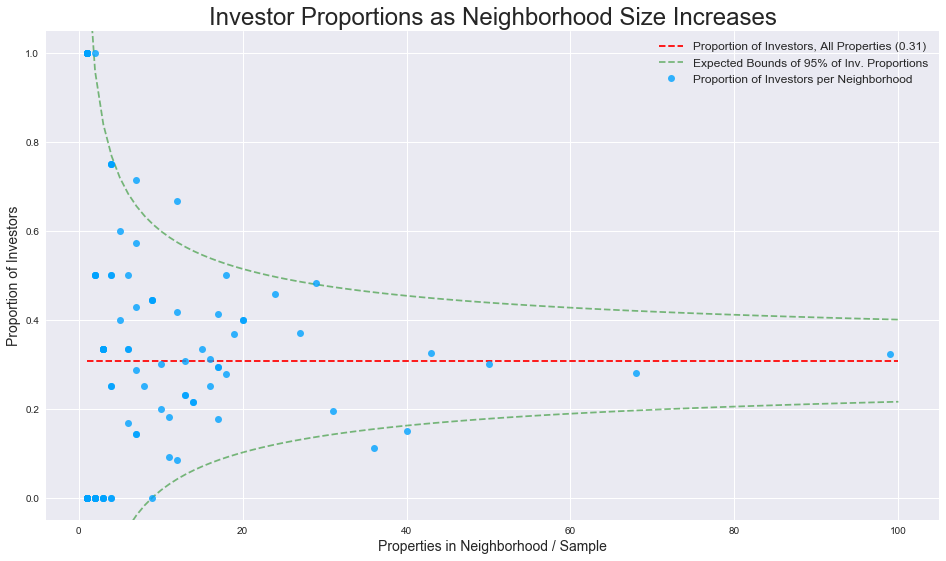

In [187]:
ir_all = inv_ratio_all

x = nhcounts.n_count
y = nhcounts.inv_ratio

# for each neighborhood, pull a random sample of properties from auctions of equal number
y_rand = nhcounts.apply(rand_investor_ratios, axis=1)

x_lin = np.linspace(1,100, num=99)
y_avg = [ir_all] * len(x_lin)
# y_2sd_pos = ir_all + (2 * np.sqrt(x_lin * ir_all * (1-ir_all)) / x_lin)
# y_2sd_neg = ir_all - (2 * np.sqrt(x_lin * ir_all * (1-ir_all)) / x_lin)

plt.figure(figsize=(16,9))
plt.plot(x_lin, y_avg, 'r--', label='Proportion of Investors, All Properties (0.31)')
# plt.plot(x_lin, y_2sd_pos, 'g--', alpha=0.5, label='Expected Bounds of 95% of Inv. Proportions')
plt.plot(x_lin, y_2sd_neg, 'g--', alpha=0.5)
plt.plot(x, y, 'o', color='#00A2FF', alpha=0.8, label="Proportion of Investors per Neighborhood")
# plt.plot(x, y_rand, 'ko', alpha=0.5, label="Proportion of Investors per Random Sample") # color='#44AF69'
plt.legend(fontsize=12)
plt.xlabel("Properties in Neighborhood / Sample", fontsize=14)
plt.ylabel("Proportion of Investors", fontsize=14)
plt.ylim(-0.05, 1.05)
plt.title("Investor Proportions as Neighborhood Size Increases", fontsize=24);

# plt.savefig('../viz/nhood_inv.png', dpi=200, bbox_inches = 'tight')

### Council District

In [15]:
auctions[auctions.purchasertype == 'Homebuyer'].groupby('councildistrict').purchasertype.count()

councildistrict
1    105
2     97
3     69
4    164
5     68
6     47
7    172
Name: purchasertype, dtype: int64

''

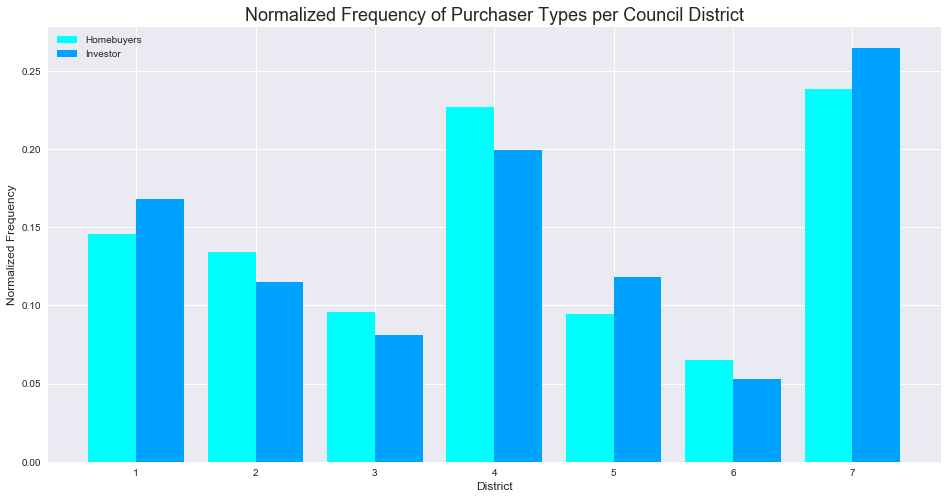

In [16]:
counts_norm = []

for buyer in ['Homebuyer', 'Investor']:
    counts = np.array(auctions[auctions.purchasertype == buyer]
                 .groupby('councildistrict')
                 .purchasertype
                 .count()
                )
    counts = counts / counts.sum()            
    counts_norm.append(counts)

x = np.array(range(1,8))

plt.figure(figsize=(16,8))

plt.bar(x - 0.2,
        counts_norm[0],
        color='cyan',
        width=0.4,
        align='center',
        label='Homebuyers')

plt.bar(x + 0.2,
        counts_norm[1],
        color='#00A2FF',
        width=0.4,
        align='center',
        label='Investor')

plt.legend()
# plt.xticks([-0.25,0.25], ['Democrats', 'Republicans'])
plt.xlabel("District", fontsize=12)
plt.ylabel("Normalized Frequency", fontsize=12)
plt.title("Normalized Frequency of Purchaser Types per Council District", fontsize=18)

# plt.savefig('../img/bar_districts.png', dpi=200, bbox_inches = 'tight')
;

In [17]:
counts_norm[0].sum()

1.0

### Maps!

In [18]:
inv_lats = list(auctions[auctions.purchasertype == 'Investor']['latitude'])
inv_lons = list(auctions[auctions.purchasertype == 'Investor']['longitude'])
hb_lats = list(auctions[auctions.purchasertype == 'Homebuyer']['latitude'])
hb_lons = list(auctions[auctions.purchasertype == 'Homebuyer']['longitude'])

''

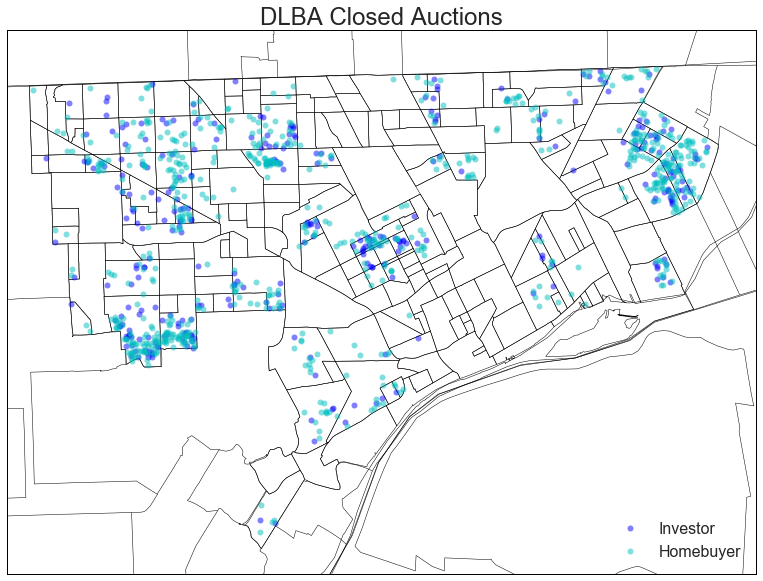

In [75]:
plt.figure(figsize=(16, 10))
m = Basemap(projection='merc', # 'merc', 'lcc'
            resolution='i', # 'c', 'l', 'i', 'h', 'f', None
            area_thresh=0.1,
            # width=36000,
            # height=24000,
            # lat_0=42.3313889, lon_0=-83.0458333,
            llcrnrlon=-83.30, llcrnrlat=42.245, 
            urcrnrlon=-82.89, urcrnrlat=42.465, 
           )

# m.drawcountries()
# m.drawcoastlines()
# m.drawstates()
# m.fillcontinents(color='white', lake_color='aqua')
m.drawmapboundary(fill_color='white')
# m.drawrivers(color='blue')
# m.bluemarble(scale=0.2)

# m.readshapefile("../data/river/AOC_MI_DETROIT", 'river2')
# m.readshapefile("../data/tract10_mi/tract10_miv14a", 'cities') # needs reformatting
m.readshapefile("../data/mi_admin/michigan_administrative", 'admin')
# m.readshapefile("../data/mi_hwy/michigan_highway", 'hwy') # too much!!
m.readshapefile("../data/neighborhoods/geo_export_333d2406-1960-4afa-a078-0ff790c78e70", 'neighborhoods')
# m.readshapefile("../data/zipcodes/geo_export_681b42b5-2249-4750-9e61-6e2271a3974d", 'zips')
# m.readshapefile("../data/councildistricts/geo_export_cafa6f85-7226-42e7-a1e1-2f808c72737b", 'districts')
# m.readshapefile("../data/mi_coast/michigan_coastline", 'river')

xh, yh = m(hb_lons, hb_lats)
xi, yi = m(inv_lons, inv_lats)

plt.plot(xi, yi, 'o', color='#0000FF', markersize=6, alpha=0.5, label="Investor")
plt.plot(xh, yh, 'co', markersize=6, alpha=0.5, label="Homebuyer")
plt.legend(loc='lower right', fontsize=16)
plt.title("DLBA Closed Auctions", fontsize=24)


# plt.savefig('../img/map_district.png', dpi=200, bbox_inches = 'tight')
# plt.savefig('../img/map_nhood.png', dpi=200, bbox_inches = 'tight')
;